# GWP 3

This docuemnt discusses the braoder financial market theme of Frictional risk factors- which include Liquidity and Regulation.

## Section 1: Introduction 

Markets are a complex interplay and dance between various players, including buyers, sellers, market makers, regulators, banks, investors, traders, and now more recently lots of algorithms. 

While there are multiple factors that influence, mediate and modulate this interplay, this document discusses the frictional factors of these. 

Definitions
1. Frictional factors: These are any and all possible reasons markets do not always achieve the full supply-demand equilibrium as copared to a theoretical model with inifinite liquidity, fully rational actors and complete information. In other words, these obstacles reduce the efficiency of financial markets, while also affecting the smooth functioning of the economy via trade. 

For today's analysis, we will primarily focus on two frictional factors, although they are related to other frictional factors, as we will discuss: 

2. Liquidity: Liquidity is the ease of buying or selling goods because there are willing participants to take on the other side of the trade. Liquidity may be limited due to inventory constraints, capital constraints, platform constraints, lack of market makers, and/ or potential complexities with affecting the transfer, in addition, to a lack of methodologies to understand or mitigate counterparty risk etc. 
3. Regulation: Market regulations can be seen as a roadblock in the smooth functioning of financial markets, acting as a brake on the flow of capital and information. These government-imposed rules and restrictions can increase transaction costs and create uncertainty, acting as a drag on market efficiency. 
Note that regulations affect liquidity and vice versa. For example, regulations like capital margin requirements, insider trading laws, disclosure rules, rules about trading with certain countries like sanctions etc. directly affect the liquidity of these markets and also the perception of risk, and hence in the end, prices themselves. 

Liquidity Factor
There is no single formula to estimate liquidity risk or to specify how liquid a specific market is, as it is a complex and multi-faceted concept that depends on various factors such as market conditions, asset characteristics, and the behavior of market participants. However, some commonly used measures to assess liquidity risk include:
Bid-ask spread: The difference between the highest price a buyer is willing to pay for an asset and the lowest price a seller is willing to accept. Many economies and regulators use this as the prima-facie metric for liquidity. 
Volume-to-open interest ratio: A measure of how much of an asset is being traded relative to the total amount outstanding. 
Implied volatility: An estimate of how much the price of an asset is expected to fluctuate based on options prices. 
Time-to-execute: The time it takes to buy or sell a specific volume of an asset at the prevailing market price. As we know, equity markets are remarkably efficient, especially for well known stocks in the US like S&P 500 companies, executing in nano-seconds, whereas even bonds of the same companies can take hours to get executed. 
Market depth: A measure of the willingness of market participants to buy or sell a particular asset at various prices. In some cases, this is also referred to as the depth of the market book, which suggests how deep the bid and ask go in terms of the total numbers of the specific asset being sold. 
These measures can provide insights into the liquidity of a market, but should be used in conjunction with other information and analysis to fully understand the liquidity risk in a market.



The above image shows a simple example of bid-asks spreads and a market book. As we can see here, this image, taken from cryptopia shows the number (or quantity of crypto currency) that is available to buy or sell based on the existing active bids and asks of the various players in the market. 

The bid-ask spread, and the depth of the market book are generated from the list of buy-orders as shown above. 
Regulation Factor 
Measuring the regulatory frictional factor in financial markets can be a challenging task, as regulations can impact financial markets in many ways and their effects can be difficult to quantify.  Regulation can be in the form of taxes, information disclosure rules, transactional costs, capital requirements, and also modifying the interest rate, setting inflation targets and applying other monetary policy to advise and inform the financial markets in various ways. 

The impact of these “regulations” or “monetoary policy” is often measured in a variety of ways as there’s not always a simple approach to measuring these. 
Cost-benefit analysis: Evaluating the costs and benefits of a particular regulation, including the costs of compliance and the potential benefits in terms of improved market stability or consumer protection.

Econometric analysis: Using statistical methods to quantify the relationship between regulation and various market outcomes, such as trading volume or market efficiency. These often present a realistic way to measure the impact of regulation ex-post, while also learning from how regulation has impacted markets in various economies and using those lessons to influence the final outcome in a specific case. 
Simulation modeling: Using computer models, AI and other approaches to simulate the impact of a regulation on a particular market, taking into account factors such as market structure, asset characteristics, and market participant behavior.
Surveys and interviews: Gathering qualitative data from market participants and experts to understand the practical impact of regulation on market functioning. This is often a great way to understand what unexpected effects a particular market mechanism may have on the over-all working of the market. 

These approaches can provide insights into the impact of regulation on financial markets, but should be used in conjunction with other information and analysis to fully understand the regulatory frictional factor in financial markets.

## Section 2: Code

In this section, we consider the liquidity metrics discussed in the previous section for the following instruments: 

a. SPY ETF (US market) 
b. QQQ ETF (US market) 
c. AAPL stock (US market) 
d. AAPL corporate bond (US market)
e. S&P 500 index (US market) 
f. DAX Performance Index  (German market)  
g. SSE Composite Index (SHCOMP - Shanghai stock exchange) 

For the sake of efficiency, we focus on volume as the metric of choice of a 5y period. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [24]:
data = yf.download(["SPY", "^GSPC", "^GDAXI"],"2018-01-01", "2022-12-31")

[*********************100%***********************]  3 of 3 completed


In [28]:
data.Volume.describe()

,SPY,^GDAXI,^GSPC
count,1.259000e+03,1.268000e+03,1.259000e+03
mean,8.722074e+07,8.520337e+07,4.230836e+09
std,4.583611e+07,3.739920e+07,1.081698e+09
min,2.027000e+07,0.000000e+00,1.296530e+09
25%,5.775315e+07,6.366250e+07,3.523815e+09
50%,7.581760e+07,7.850310e+07,3.995250e+09
75%,1.023069e+08,9.874040e+07,4.683670e+09
max,3.922207e+08,4.001654e+08,9.976520e+09


As we can see, the volumes are quite different for all three assets/ indices. The mean volume is significantly higher for GSPC, which is one of the world's most popular indices. 

Comparitively, the SPY ETF and the GDAX index have much lower volumes. 



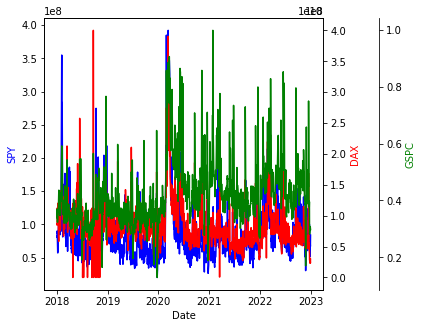

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Matplotlib figure and axis objects
fig, ax1 = plt.subplots(figsize=(5,5))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the first line chart using the first axis
sns.lineplot(data=data.Volume.iloc[:,0], color='blue', ax=ax1)

# Plot the second line chart using the second axis
sns.lineplot(data=data.Volume.iloc[:,1], color='red', ax=ax2)

# Offset the third axis to the right and plot the third line chart
offset = 60
ax3.spines['right'].set_position(('axes', 1.2))
sns.lineplot(data=data.Volume.iloc[:,2], color='green', ax=ax3)

# Label the y-axes
ax1.set_ylabel('SPY', color='blue')
ax2.set_ylabel('DAX', color='red')
ax3.set_ylabel('GSPC', color='green')

# Show the plot
plt.show()

Note that the 3 assets are scaled differently as shown by the colors, however, we see that the relative variances of the 3 assets and their volumes are also different. 

As we live in a global economy and the volumes and prices are often correlated across all asset prices, it is most interesting to see that the GSPC index has a relatively lower degree of variance than the German index, as demonstrated by this chart. This could be because of the effects of various leverage and margin requirements imposed by the regulations of the two countries (Germany and USA). 

In [41]:
means = data.Volume.mean()

In [42]:
stdevs = data.Volume.std()

In [44]:
stdevs/ means

SPY       0.525519
^GDAXI    0.438940
^GSPC     0.255670
dtype: float64

We see indeed that the relative standard deviation is higher for GDAX than GSPC, because GDAX is a more illiquid index compared to GSPC. 

Unsurprisingly, the variance is much higher for the SPY ETF, which is in a sense more illiquid as it requires certain regulations around the Creation and Redemption of ETFs, requires a qualified ETF issuer, is regulated having various holidng requirements etc. 

While indeed, the liquidity of ETFs is heavily affected by this, it is still recommended to have such regulation, so as to prevent issuers and ETF market makers from potentially taking extremely risky positions. 

## Section 3: Real world examples

 See accompanying pdf doc